KES propagation Block of unmyelinated fiber
===========================================

This file shows an example of action potential propagation block with an unmyelinated fiber.

1
500
2


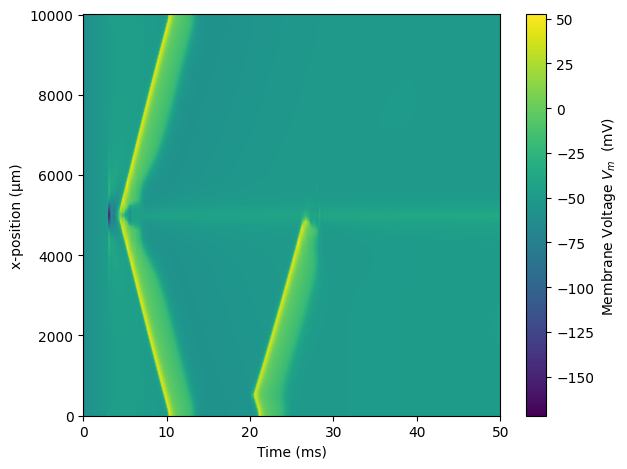

In [1]:
import nrv
import numpy as np
import matplotlib.pyplot as plt


model = 'Tigerholm'
diam = 1
y = 0
z = 0
print(diam)

L = 10000

t_sim = 50
t_position=0.05
t_start=20
t_duration=1
t_amplitude=1

b_start = 3
b_duration = t_sim
block_amp = 20000
block_freq = 10
dt = 1/(20*block_freq)
nseg_per_l = 50
n_seg = np.int32(nseg_per_l*L/1000)
print(n_seg)
material = nrv.load_material('endoneurium_bhadra')

y_elec = 500
z_elec = 0
x_elec = L/2

axon1 = nrv.unmyelinated(y,z,diam,L,model=model,Nseg_per_sec=n_seg,dt=dt)


E1 = nrv.point_source_electrode(x_elec,y_elec,z_elec)
stim_1=nrv.stimulus()
stim_1.sinus(b_start, b_duration, block_amp, block_freq ,dt=1/(block_freq*20))
stim_extra = nrv.stimulation(material)
stim_extra.add_electrode(E1,stim_1)
axon1.attach_extracellular_stimulation(stim_extra)

axon1.insert_I_Clamp(t_position, t_start, t_duration, t_amplitude)       


# simulate axon activity
results = axon1.simulate(t_sim=t_sim)
results.filter_freq('V_mem',block_freq)
results.rasterize('V_mem_filtered')

print(results.count_APs("V_mem_filtered"))

fig, ax = plt.subplots(1)
cbar = results.colormap_plot(ax, "V_mem_filtered")
ax.set_xlabel('Time (ms)')
ax.set_ylabel('x-position (µm)')
ax.set_title('KES Block')
cbar.set_label(r'Membrane Voltage $V_m$ (mV)')

fig, axs = plt.subplots(2)
results.plot_x_t(axs[0],'V_mem_filtered')
axs[0].set_ylabel("Axon x-axis (µm)")
axs[0].set_xlabel("Time (ms)")
axs[0].set_xlim(0,30)
axs[0].set_ylim(0,np.max(results.x_rec))

results.raster_plot(axs[1],'V_mem_filtered')
axs[1].set_ylabel("Axon x-axis (µm)")
axs[1].set_xlabel("Time (ms)")
axs[1].set_xlim(0,30)
axs[1].set_ylim(0,np.max(results.x_rec))

#plt.show()